In [42]:
# Importacion de librerias 
import numpy as np, pandas as pd
from scipy import stats as st 
from matplotlib import pyplot as plt

# Procesamiento de datos 

In [43]:
df_games = pd.read_csv('games.csv',sep=',')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [44]:
# Nombre de columnas a minusculas, quitar espacios

df_games.columns = [col.lower().strip() for col in df_games.columns]
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [45]:
# Convertir datos a los tipos adecuados 
df_games.loc[df_games['user_score'] == 'tbd', 'user_score'] = np.nan

df_games['user_score'] = df_games['user_score'].astype(float)*10
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')

df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


## Se hizo el cambio a la columna year_of_release a tipo entero y la columna user_score a tipo float. ##

La columna de año se hizo el cambio ya que no tenemos 'medios' años es decir o es 2016 o 2017 y la columna user_score se hizo cambio a float, se normalizo (multiplico por 10) y se elimino el termino 'tbd' para poder hacer el cambio. El string 'tbd' se cambio por un valor ausente. 

Decidi dejar los valores ausentes ya que para estos casos no podemos conocer los valores (year_of_release, user_score) como encontrar la media o la mediana. Es imposible para nosotros sacar este dato, entonces lo tratamos como un valor inexistente. Lo mas probable para estos valores ausentes es que gracias a la baja popularidad del juego en cuestion, no mucha gente lo conoce o lo jugo. Sin una suficiente poblacion puede ser que el juego no haya conseguido una user_score por esa manera. En cuanto al año puede ser que al momento de introducir los años de los juegos haya existido algun error humano o juegos, como lo mencione antes, no muy reconocidos donde no hay suficiente documentacion de estos. 
    
El string 'tbd' se cambio a valor ausente debido a que, como lo mencione previamente, nos es imposible sacar la critica que le dieron los usuarios entonces no le podemos poner 0 ni cualquier otro valor ya que esto indicaria que no fue un juego bien recibido por la audiencia cuando en realidad eso no se sabe. 

In [46]:
# Calculo de las ventas totales 

df_games['total_sales'] = df_games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df_games.fillna({'critic_score':df_games['critic_score'].median()},inplace=True)
df_games.fillna({'user_score':df_games['user_score'].median()}, inplace=True)
df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


In [47]:
# Cambio al nombre de los juegos para estandarizarlos (mayusculas y eliminar signos) y eliminamos duplicados 

df_games['name'] = df_games['name'].str.upper().str.strip().str.replace('.','').str.replace(',','').str.replace(':','').str.replace(';','')

df_games.dropna(subset='year_of_release',inplace=True)
df_games.loc[df_games['name'].isna(), 'name'] = 'NOT DEFINED'

df_games.drop_duplicates(subset=['name','platform']).reset_index(drop=True,inplace=True)

df_games.fillna({'genre':'Not Defined'},inplace=True)

In [48]:
# Agrupar plataformas por marca

def platform_group(x):
    if x in ['3DS','DS','GB','GBA','GC','N64','NES','SNES','Wii','WiiU']:
        return 'Nintendo'
    elif x in ['PC', 'PCFX']:
        return 'PC'
    elif x in ['X360','XB','XOne']:
        return 'Xbox' 
    elif x in ['PS3','PS2','PS4','PS','PSP','PSV',]:
        return 'Playstation'
    else: 
        return 'Other'
    
df_games['platform_group'] = df_games['platform'].apply(platform_group)

# Datos limpios 
df_games.to_csv('games_clean.csv',index=False)

df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_group
0,WII SPORTS,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54,Nintendo
1,SUPER MARIO BROS,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,75.0,NaN,40.24,Nintendo
2,MARIO KART WII,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52,Nintendo
3,WII SPORTS RESORT,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77,Nintendo
4,POKEMON RED/POKEMON BLUE,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,75.0,NaN,31.38,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,SAMURAI WARRIORS SANADA MARU,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,75.0,NaN,0.01,Playstation
16711,LMA MANAGER 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,75.0,NaN,0.01,Xbox
16712,HAITAKA NO PSYCHEDELICA,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,75.0,NaN,0.01,Playstation
16713,SPIRITS & SPELLS,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,75.0,NaN,0.01,Nintendo


# Analisis de datos 

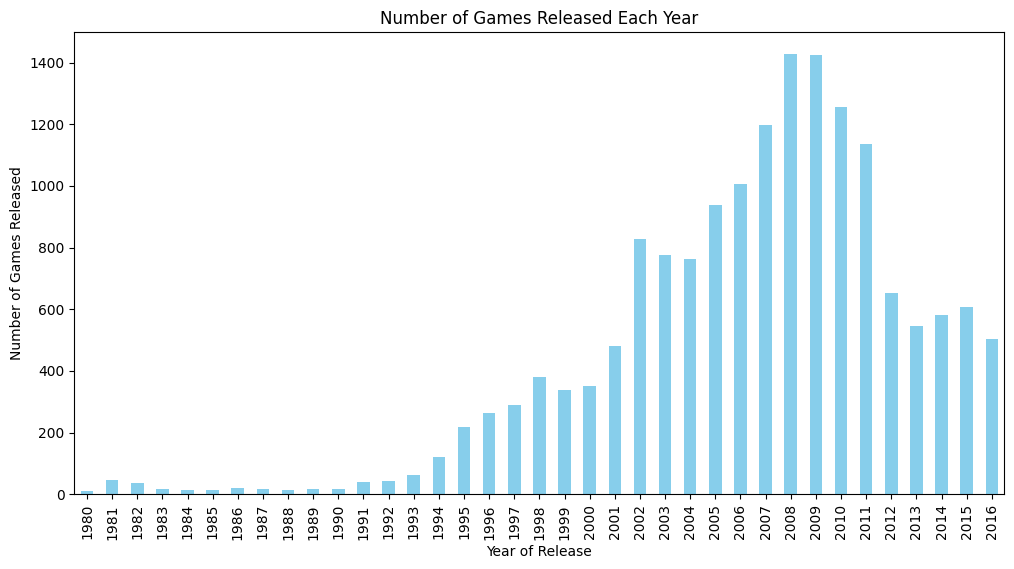

In [49]:
games_released_per_year = df_games.groupby('year_of_release')['name'].count()

plt.figure(figsize=(12, 6))
games_released_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released Each Year')
plt.show()

Se puede observar como al pasar los años los videojuegos empezaron a ser cada vez mas populares, por ende cada año habia una cantidad mayor de videojuegos. 

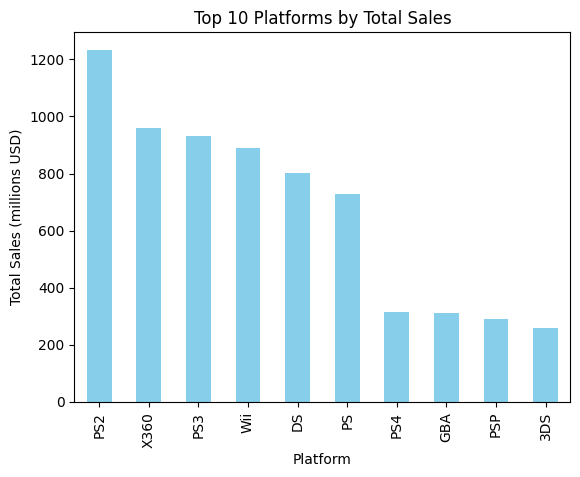

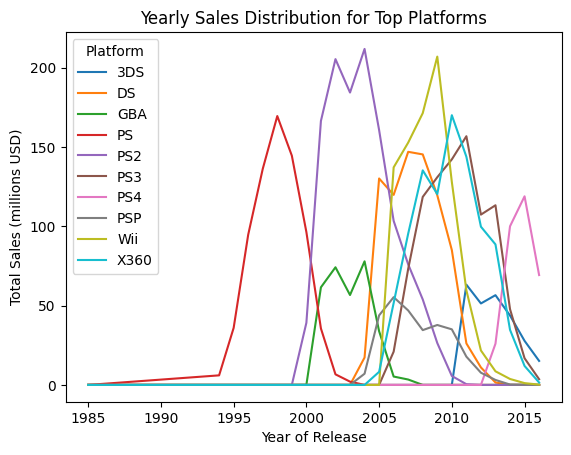

In [50]:

top_sales_group = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

top_sales_group.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions USD)')
plt.title('Top 10 Platforms by Total Sales')
plt.show()

top_platform_names = top_sales_group.head(10).index
top_platform_data = df_games[df_games['platform'].isin(top_platform_names)]
platform_year_sales = top_platform_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)

platform_year_sales.plot(kind='line')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions USD)')
plt.title('Yearly Sales Distribution for Top Platforms')
plt.legend(title='Platform')
plt.show()

Como se puede observar en la grafica anterior, el playstation 2 tuvo el mejor numero de ventas para videojuegos. Asimismo podemos observar que todas las plataformas tienen una vida activa de alrededor de 10 años donde es masomenos cuando compienzan a salir nuevas consolas y se para la produccion para las plataformas anteriores, es por eso que se detienen las ventas.

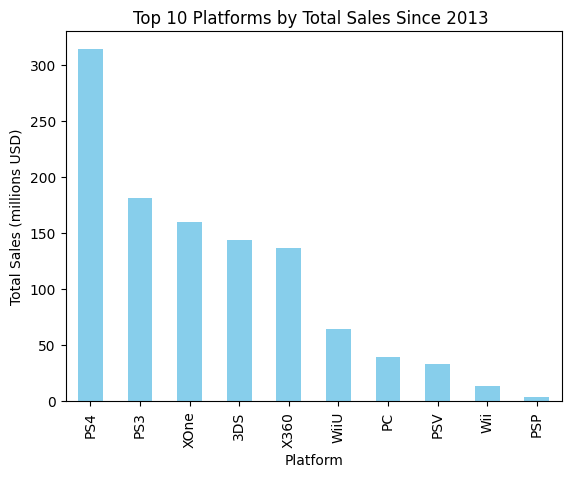

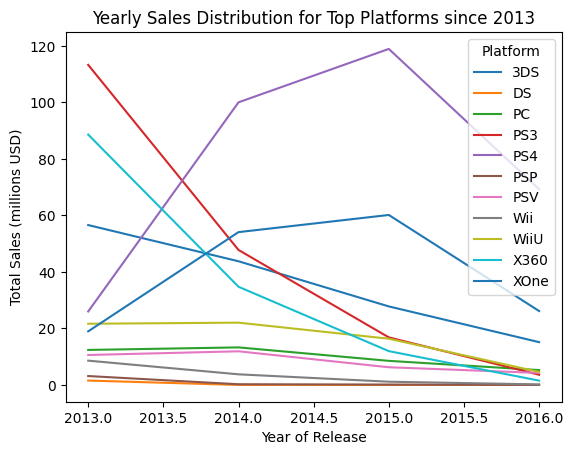

In [51]:
# Estaremos trabajando con datos a partir del 2013 ya que fue cuando se lanzaron las nuevas consolas (xbox one y playstation 4) 
# debido a esto puede que sean las que tengan un mayor potencial y a donde se debe enfocar la campaña del 2017

df_games_2013 = df_games[(df_games['year_of_release'] >= 2013) ] 

top_platforms_2013 = df_games_2013.groupby(['year_of_release','platform'])['total_sales'].sum().unstack(fill_value=0)
top_sales_group_2013 = df_games_2013.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

top_sales_group_2013.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions USD)')
plt.title('Top 10 Platforms by Total Sales Since 2013 ')
plt.show()

top_platforms_2013.plot()
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions USD)')
plt.title('Yearly Sales Distribution for Top Platforms since 2013')
plt.legend(title='Platform')
plt.show()

A simple vista podemos observar que los lideres del momento son el PS4 y el Xbox One. Como se puede observar estos parecen estar enbajada en cuanto a ventas totales, sin embargo no significa que no puedan volver a crecer. Haciendo una investigacion un poco mas a fondo podemos ver tambien que el 3DS no tiene un numero de ventas muy elevado, sin embargo a comparacion de las otras plataformas ha tenido un decenso mas lineal que las otras. En el 2016 alcanzo hasta 15 millones en ventas, lo cual todavia es un numero significativo. Me parece que deberiamos enfocarnos en en el PS4 y Xbox one sin embargo no hay que descartar el 3DS tan rapidamente. 

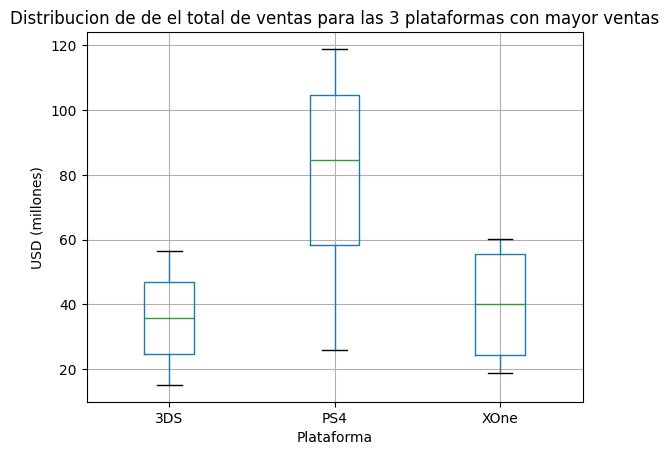

In [52]:
top_3_juego_plataforma = df_games_2013[df_games_2013['platform'].isin(['3DS','XOne','PS4'])]

top_3_ventas = top_3_juego_plataforma.groupby(['year_of_release','platform'])['total_sales'].sum().unstack(fill_value=0)

top_3_ventas.boxplot()
plt.title('Distribucion de de el total de ventas para las 3 plataformas con mayor ventas')
plt.ylabel('USD (millones)')
plt.xlabel('Plataforma')
plt.show()


Se puede observar que evidentemente el PS4 tiene el mayor numero de ventas donde su media varia bastante en comparacion al xbox one y al 3DS. Su media es de alrededor ~85 sin embargo podemos ver que tambien es el que tiene mayor varianza en sus datos. En comparacion, el 3DS y el Xbox one estan muy parecidos, claro el 3ds tiene una media menor sin embargo no por mucho. 

Podemos asumir que nuestra primera prioridad deberia ser el playstation 4, como segunda el xbox one y finalmente el 3ds. 

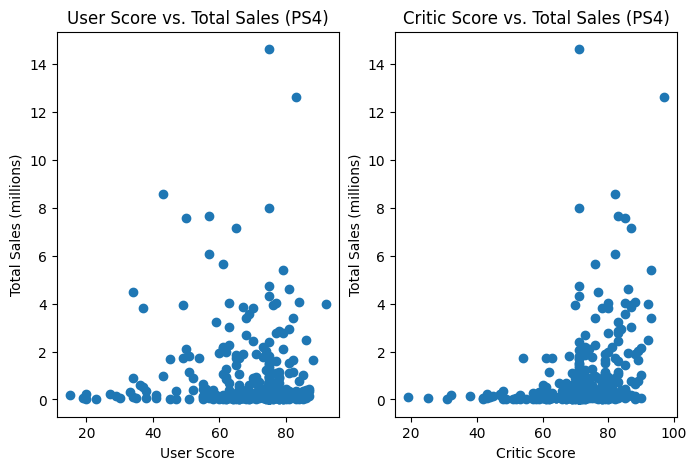

              user_score  critic_score  total_sales
user_score      1.000000      0.507069    -0.062756
critic_score    0.507069      1.000000     0.338706
total_sales    -0.062756      0.338706     1.000000


In [53]:
PS4_2013 = df_games_2013[df_games_2013['platform'] == 'PS4']

plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
plt.scatter(PS4_2013['user_score'], PS4_2013['total_sales'])
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.title('User Score vs. Total Sales (PS4)')

plt.subplot(1,2,2)
plt.scatter(PS4_2013['critic_score'], PS4_2013['total_sales'])
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.title('Critic Score vs. Total Sales (PS4)')
plt.show()

cor = PS4_2013[['user_score','critic_score','total_sales']].dropna().corr()
print(cor)

### Relacion entre User Score y Total Sales 

Podemos observar como el primer grafico muestra una relacion muy dispersa enre el puntaje de los usuarios contra las ventas totales. Lo que nos indica que las ventas altas no estan directamente asociadas con puntuaciones altas de los usuarios. 

Asimismo podemos ver como el malor de correlacion entre estos dos es de -0.0336 lo cual nos indica que hay una correlacion muy baja, practicamente inexistente. 

### Relacion entre Criti Score y Total Sales

El segundo grafico muestra una tendencia muy ligera hacia el aumento de ventas con puntuaciones mas altas de los criticos, sin embargo sigue habiendo una cantidad significativa de variablilidad. 

El valor de correlacion para estas dos variables se encuentra en 0.4059 lo cual nos indica una correlacion positiva moderada. Esto nos sugiere que la puntuacion de los criticos puede tener un impacto mas significativo en las ventas de los juegos en comparacion a las puntuaciones de los usuarios. 

['PS3' 'X360' 'XOne' 'Wii' 'PSV' 'PC' '3DS' 'WiiU' 'DS' 'PSP']


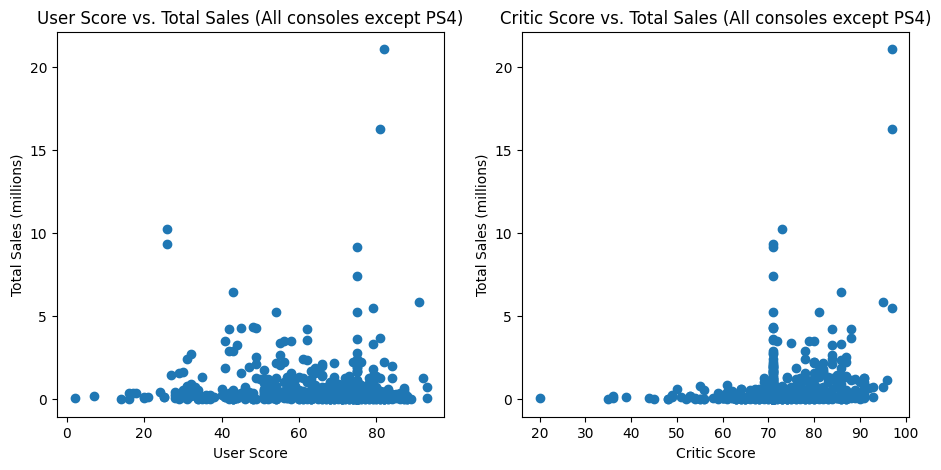

              user_score  critic_score  total_sales
user_score      1.000000      0.229253    -0.093147
critic_score    0.229253      1.000000     0.259634
total_sales    -0.093147      0.259634     1.000000


In [54]:
same_games_wo_ps4 = df_games_2013[df_games_2013['name'].isin(PS4_2013['name']) & (df_games_2013['platform'] != 'PS4')]

print(same_games_wo_ps4['platform'].unique())

plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
plt.scatter(same_games_wo_ps4['user_score'], same_games_wo_ps4['total_sales'])
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.title('User Score vs. Total Sales (All consoles except PS4)')

plt.subplot(1,2,2)
plt.scatter(same_games_wo_ps4['critic_score'], same_games_wo_ps4['total_sales'])
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.title('Critic Score vs. Total Sales (All consoles except PS4)')
plt.show()

cor = same_games_wo_ps4[['user_score','critic_score','total_sales']].dropna().corr()
print(cor)

### Relacion entre User Score y Total Sales excluyendo al PS4

El grafico muestra como la dispersion de las ventas totales son bajas en la mayoria de los casos independientemente de la puntuacion de los usuarios. Podemos observar que el valor de correlacion es de -0.0636 lo cual sugiere una correlacion practicamente nula. Esto nos indica que las puntuaciones de los usuarios no tienen una relacion significativa con las ventas de los mismos juegos del PS4 en las plataformas distintas al PS4

### Relacion entre Critic Score y Total Sales excluyendo al PS4

Similarmente a la grafica pasada donde se hacia la comparacion unicamente de la plataforma PS4. Se puede observar una ligera tendencia ascendente de forma limitada. Parece que los juegos con puntuaciones altas de los criticos tienen a tener mayores ventas sin embargo no es consistente
Podemos ver como el valor de la correlacion es de 0.2666 lo cual nos indica una correlacion positiva baja. Esto nos puede sugerir que hay una ligera relacion positiva, sin embargo podemos conlclur que las puntuaciones de los criticos no son un factor determinatne en las ventas de juegos en plataformas diferentes al PS4. 


In [55]:
genre_sales = df_games.groupby('genre').agg(total_sales=('total_sales','sum'),game_count=('total_sales','count')).reset_index()

genre_sales.sort_values(by='total_sales', ascending=False, inplace=True)

genre_sales

,genre,total_sales,game_count
0,Action,1716.52,3307
11,Sports,1309.67,2306
9,Shooter,1041.36,1296
8,Role-Playing,931.08,1481
5,Platform,825.55,878
3,Misc,790.29,1721
7,Racing,723.49,1226
2,Fighting,442.66,837
10,Simulation,387.96,857
6,Puzzle,239.89,569


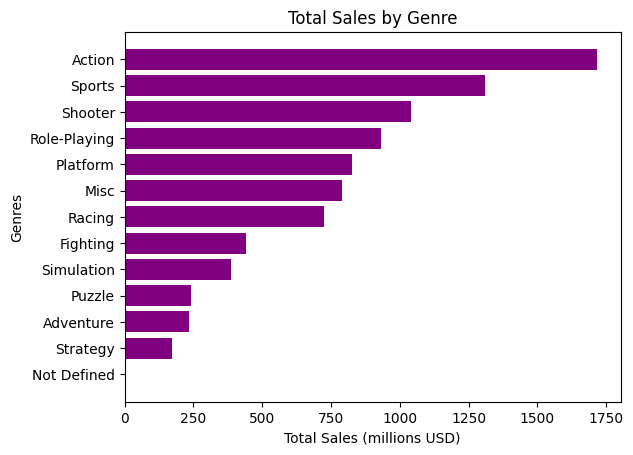

In [56]:
plt.barh(genre_sales['genre'],genre_sales['total_sales'], color='purple')
plt.title('Total Sales by Genre')
plt.xlabel('Total Sales (millions USD)')
plt.ylabel('Genres')
plt.gca().invert_yaxis()
plt.show()


### Generos mas rentables 

Los generos mas rentables son los que dominan las ventas totales, en este caso el mas destacado es el genero de accion. Esto nos sugiere una alta popularidad y demanda contante por parte de los consumidores. Asi mismo otros generos muy populares son los deportes los shooters, estos generos pueden ser tan populares ya que inlcuyen franquicias como Call of Duty para shooters o Fifa y Madden que son juegos de deportes que tienen un lanzamiento anual. 

## Generos con ventas bajas 

Se puede observar como los generos que tienen menores ventas como lo son los de estrategia, aventura y rompecabezas, estos pueden llegar a ser tan bajos porque es posible que tengan un publico mas de nicho o son juegos dentro de estos generos que no estan comercializados como los de otros generos. 


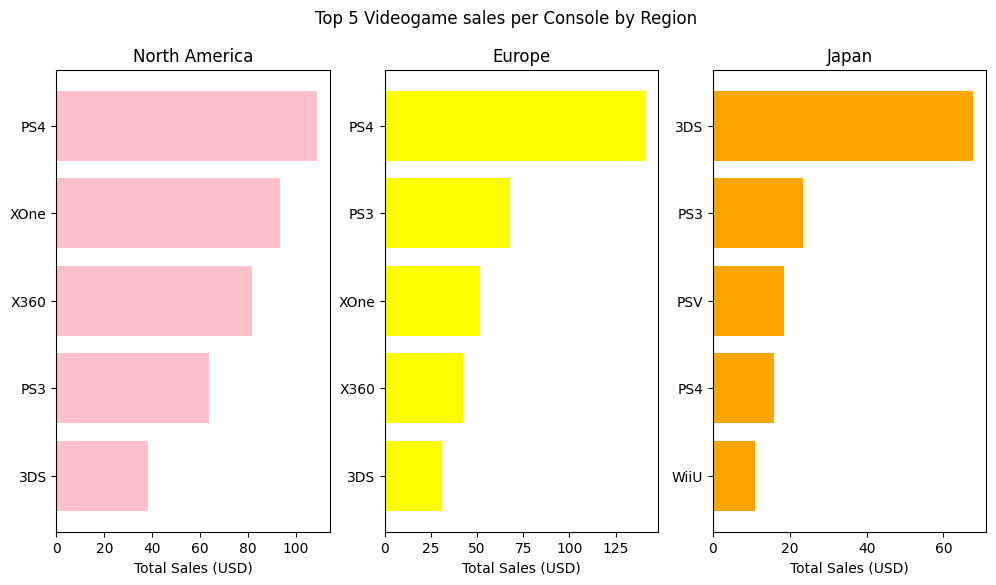

In [57]:
individual_sales = df_games_2013.groupby('platform')[['na_sales','eu_sales','jp_sales']].sum().reset_index()

na_reg = individual_sales[['platform','na_sales']].sort_values(by='na_sales').tail(5)
eu_reg = individual_sales[['platform','eu_sales']].sort_values(by='eu_sales').tail(5)
jp_reg = individual_sales[['platform','jp_sales']].sort_values(by='jp_sales').tail(5)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.suptitle('Top 5 Videogame sales per Console by Region')
plt.barh(na_reg['platform'], na_reg['na_sales'],color='pink')
plt.title('North America')
plt.xlabel('Total Sales (USD)')

plt.subplot(1,3,2)
plt.barh(eu_reg['platform'],eu_reg['eu_sales'],color='yellow')
plt.title('Europe')
plt.xlabel('Total Sales (USD)')

plt.subplot(1,3,3)
plt.barh(jp_reg['platform'],jp_reg['jp_sales'],color='orange')
plt.title('Japan')
plt.xlabel('Total Sales (USD)')
plt.show()

### NA SALES

Se pede observar que an america del norte las consolas que dominan las ventas son el PS4 y el Xbox ONE lo que refleja una fuerte preferencia por consolas de ultima generacion en esta region. 

El 3DS tiene las ventas mas bajas lo que nos indica que los dispositivos portatiles tienen un mercado mas limitado en esta region.

### EU SALES 

Podemos observar como el PS4 lidera el mercado en europa de manera destacada. Esto nos indica una fuerte preferencia por las consolas de Sony en esta region. 
Asimismo podemos observar que PS3 tambien tiene un buen rendimiento sin embargo, parece que sus ventas podran empezar a disminuir conforme el paso de los años debido a la nueva consola el PS4. 

Las consolas de microsoft (Xbox one y Xbox 360) estan presentes en los top 5 sin embargo estas cuentan con una menor cuota que norte america. 

De la misma manera que en norte america el 3DS tiene las ventas mas bajas de todos lo que nos indica que no es un mercado que demuestra un interes por dispositivos portatiles. 

### JP SALES 

A diferencia de las regiones NA y EU podemos ver como en el mercado japones domina las ventas el 3DS lo que nos indica la popularidad de las consolas portatiles en esta region.

Las siguientes ventas significativas estan de parte de PS3, PSV y PS4 lo que nos refleja una preferencia de plataformas sony 

Y en ultimo lugar podemos apreciar al Wii U. Esto nos indica una fuerte preferencia por consolas japonesas.

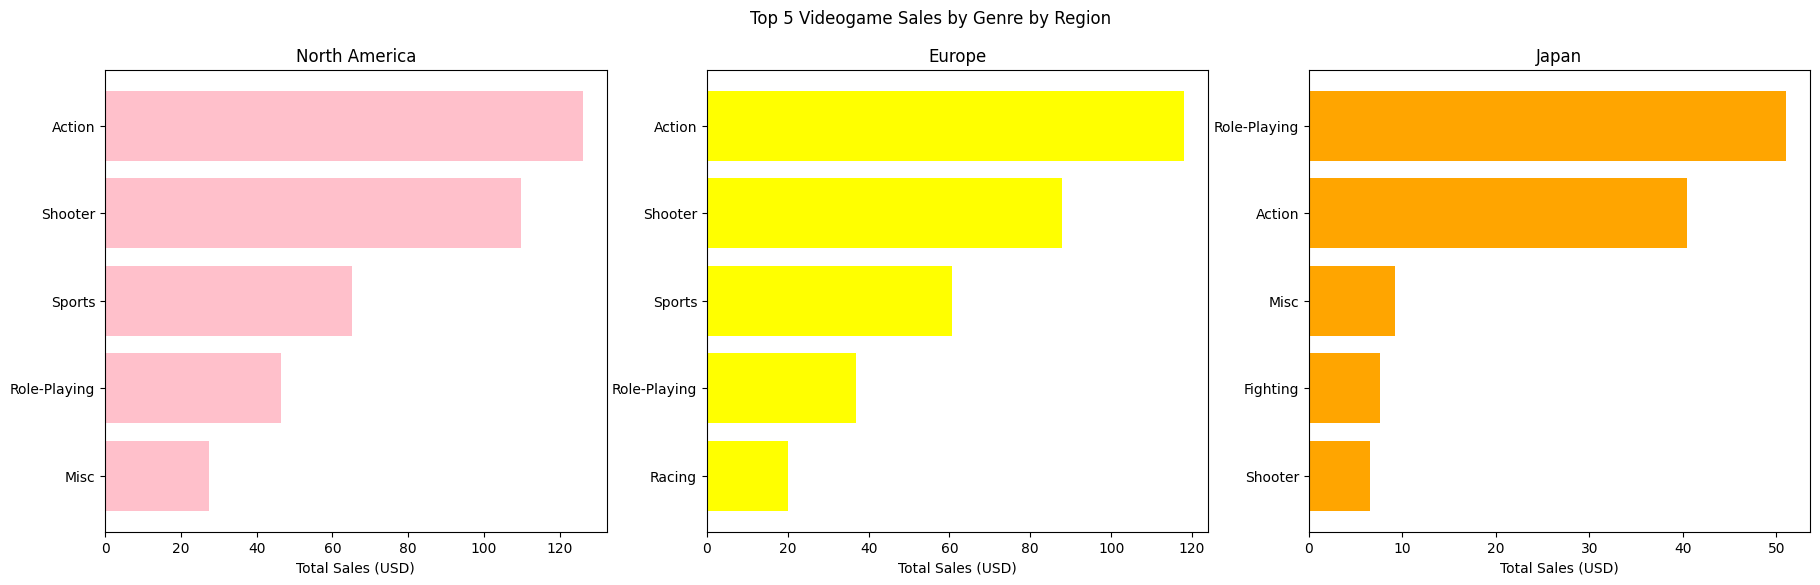

In [58]:
individual_sales_genre = df_games_2013.groupby('genre')[['na_sales','eu_sales','jp_sales']].sum().reset_index()

na_reg_genre = individual_sales_genre[['genre','na_sales']].sort_values(by='na_sales').tail(5)
eu_reg_genre = individual_sales_genre[['genre','eu_sales']].sort_values(by='eu_sales').tail(5)
jp_reg_genre = individual_sales_genre[['genre','jp_sales']].sort_values(by='jp_sales').tail(5)

plt.figure(figsize=(22,6))
plt.subplot(1,3,1)
plt.suptitle('Top 5 Videogame Sales by Genre by Region')
plt.barh(na_reg_genre['genre'], na_reg_genre['na_sales'],color='pink')
plt.title('North America')
plt.xlabel('Total Sales (USD)')

plt.subplot(1,3,2)
plt.barh(eu_reg_genre['genre'],eu_reg_genre['eu_sales'],color='yellow')
plt.title('Europe')
plt.xlabel('Total Sales (USD)')

plt.subplot(1,3,3)
plt.barh(jp_reg_genre['genre'],jp_reg_genre['jp_sales'],color='orange')
plt.title('Japan')
plt.xlabel('Total Sales (USD)')
plt.show()

### NA SALES BY GENRE

Los generos dominantes en la region de norteamerica son accion y shooters. Hay un fuerte enfoque a los juegos de disparos y de accion lo cual refleja una preferencia por experiencias intensas y dinamicas. 

### EU SALES BY GENRE

La region de europa comparte el mismo enfoque en los gneeros shooter y accion como lo hace norteamerica, incluisive con los otros generos. La unica diferencia que tiene es que en europa en el lugar numero 5 de ventas por genero tienen un mayor enfoque hacia los juegos de carreras. Sin embargo podemos asumir que ambas regiones son muy similares en cuanto a su comportamiento de ventas por los generos de videojuegos. 

### JP SALES BY GENRE

Por otro lado las ventas en japon se distinguen con un mercado dominado por el genero de role playing lo cual refleja su tradicion en la creacion de RPGs. Asimismo se observa que japon valora generos diferentes a las otras regiones como lo es fighting. 

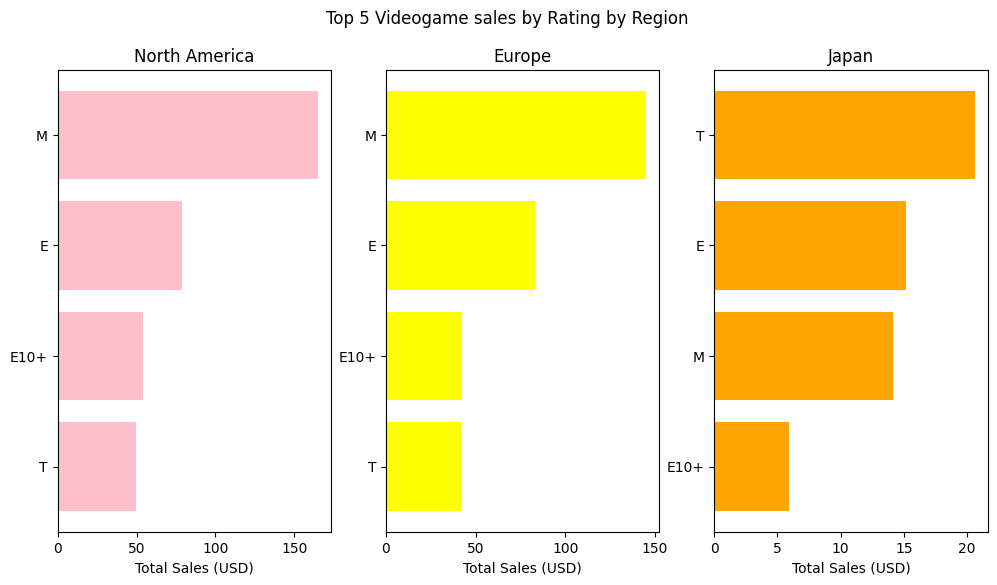

In [59]:
sales_by_rating = df_games_2013.groupby('rating')[['na_sales','eu_sales','jp_sales']].sum().reset_index()

na_reg_rating = sales_by_rating[['rating','na_sales']].sort_values(by='na_sales')
eu_reg_rating = sales_by_rating[['rating','eu_sales']].sort_values(by='eu_sales')
jp_reg_rating = sales_by_rating[['rating','jp_sales']].sort_values(by='jp_sales')

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.suptitle('Top 5 Videogame sales by Rating by Region')
plt.barh(na_reg_rating['rating'], na_reg_rating['na_sales'],color='pink')
plt.title('North America')
plt.xlabel('Total Sales (USD)')

plt.subplot(1,3,2)
plt.barh(eu_reg_rating['rating'],eu_reg_rating['eu_sales'],color='yellow')
plt.title('Europe')
plt.xlabel('Total Sales (USD)')

plt.subplot(1,3,3)
plt.barh(jp_reg_rating['rating'],jp_reg_rating['jp_sales'],color='orange')
plt.title('Japan')
plt.xlabel('Total Sales (USD)')

plt.show()

### NA AND EU SALES BY RATING
La region de norteamerica y europa comparten patrones similares con un claro dominio de los juegos clasificados como mature (M), seguidos por everyone (E). Esto refleja una preferencia por titulos orientados tanto a adultos como a familias en estars regiones. 

### JP SALES 

Por otro lado japon muestra una tendencia distinta donde los juegos teen (T) lideran las ventas seguidos por everyone (E). Esto sugiere un enfoque mas fuerte en titulos para adolescentes y juegos familiares con un menor interes en los juegos mature (M). 


In [60]:
xbox_user_scores = df_games_2013[(df_games_2013['platform'] == 'XOne') & (~df_games_2013['user_score'].isna())]['user_score']
pc_user_scores = df_games_2013[(df_games_2013['platform'] == 'PC') & (~df_games_2013['user_score'].isna())]['user_score']

action_user_score = df_games_2013[(df_games_2013['genre'] == 'Action') & (~df_games_2013['user_score'].isna())]['user_score']
sport_user_score = df_games_2013[(df_games_2013['genre'] == 'Sports') & (~df_games_2013['user_score'].isna())]['user_score']

alpha = 0.05
lev_console = st.levene(xbox_user_scores,pc_user_scores)
lev_genre = st.levene(action_user_score,sport_user_score)


# PRUEBA LEVENE CONSOLAS

print('Prueba levene para determinar si la varianza es igual entre las consolas (Xbox vs. PC)\n')
if lev_console.pvalue < alpha: 
    eq_var_consoles = False
    print('- Rechazamos la hipotesis nula: La varianza entre ambos grupos es diferente\n')
else: 
    print('- No podemos rechazar la hipotesis nula: Las varianzas de ambos grupos son iguales\n')
    eq_var_consoles = True
    
#PRUEBA LEVENE GENEROS 

print('Prueba levene para determinar si la varianza es igual entre los generos (Action vs. Sports)\n')
if lev_console.pvalue < alpha: 
    print('- Rechazamos la hipotesis nula: La varianza entre ambos grupos es diferente\n')
    eq_var_genre = False
else: 
    print('- No podemos rechazar la hipotesis nula: Las varianzas de ambos grupos son iguales\n')
    eq_var_genre = True

user_score_console_hyp = st.ttest_ind(xbox_user_scores,pc_user_scores, equal_var = eq_var_consoles)
user_score_genre_hyp = st.ttest_ind(action_user_score, sport_user_score, equal_var = eq_var_genre)

alpha = 0.05

# T-TEST PARA CONSOLAS 

print('T-test para el user_score del Xbox y PC\n')
if user_score_console_hyp.pvalue < alpha: 
    print('- Rechazamos la hipotesis nula: No podemos aceptar la hipotesis nula debido a que hay una diferencia significativa entre el puntaje del usuario para XBox y PC')
else: 
    print('- No podemos rechaza la hipotesis nula: No existe suficiente evidencia para determinar una diferencia significatva entre el putaje del usuario para Xbox y PC')

# T-TEST PARA GENEROS 
print('\nT-test para el user_score de los generos action y sports \n')
if user_score_genre_hyp.pvalue < alpha: 
    print('- Rechazamos la hipotesis nula: Hay una diferencia significativa entre el promedio del puntaje del usuario para los generos accion y deportes')
else: 
    print('- No podemos rechazar la hipotesis nula: No existe suficiente evidencia para determinar una diferencia significativa entre el promedio del puntaje del usuario para los generos de accion y deportes')

Prueba levene para determinar si la varianza es igual entre las consolas (Xbox vs. PC)

- Rechazamos la hipotesis nula: La varianza entre ambos grupos es diferente

Prueba levene para determinar si la varianza es igual entre los generos (Action vs. Sports)

- Rechazamos la hipotesis nula: La varianza entre ambos grupos es diferente

T-test para el user_score del Xbox y PC

- Rechazamos la hipotesis nula: No podemos aceptar la hipotesis nula debido a que hay una diferencia significativa entre el puntaje del usuario para XBox y PC

T-test para el user_score de los generos action y sports 

- Rechazamos la hipotesis nula: Hay una diferencia significativa entre el promedio del puntaje del usuario para los generos accion y deportes


# Conclusion general

Este proyecto nos permitio analizar multiples aspectos del mercado de videojuegos, evaluando patrones y diferencias signficativas en funcion de diversos factores como generos, plataformas, regiones y clasificaciones ESRB.

### Ventas por genero y region 

Los generos mas populares varian significativamente entre regiones donde en norteamerica y europa, los generos de actio y shooter lideraron las ventas, reflejando una preferencia por titulos dinamicos y de alta intensidad. Mientras que en japon los role playing dominaron, indicando una inclinacion cultural hacia narrativas profundas y experiencias inmersivas. 

Las diferencias culturales influyen directamente en los generos mas demandados, lo que sugiere la importancia de estrategias de marketing adaptadas a cada region. 

### Impacto de las clasificaciones ESRB en las ventas 

En norteamerica y europa, los juegos clasificados como Mature (M) tuvieron las mayores ventas mientras que japon mostro preferencia por titulos Teen (T) y Everyone (E). 

Las clasificaciones ESRB afectan las ventas segun las audiencias objetivo de cada region, destacando la importancia de comprender el perfil demografico y cultural del consumidor

### Comparacion de calificaciones de usuarios 

Se realizaron pruebas estadisticas para evaluar si existian diferencias significativas en las calificaciones promedio de los usuarios. 

- Plataformas (XOne vs. PC): No hubo evidencia suficiente para rechazar la hipotesis nula, lo que indica que las calificaciones promedio de los usuarios entre estas plataformas son similares. 

- Generos (Accion vs. Deportes): Los resultados mostraron diferencias significativas, lo que indica que los usuarios valoran estos generos de manera diferente. 

### Perspectiva general del mercado 

Este analisis destaca la complejidad del mercado de videojuegos, influenciado por: 

- Preferencias regionales y culturales. 
- Clasificaciones ESRB que determinan que titulos tienen mayor aceptacion. 
- Diferencias en como los usuarios califican juegos segun genero y plataforma. 

### Recomendaciones

- Los desarrolladores y editores deben adaptar sus lanzamientos a las preferencias especificas de cada region, tanto en terminos de genro como clasificacion ESRB. 
- Entender que factores impulsan mejores calificaciones en ciertos generos podria orientar el desarrollo hacia caracteristicas mas valoradas. 
- Seguir monitoreando tendencias globales y regionales para anticipar cambios en las preferencias de los consumidores. 

Este proyecto permitio una comprension profunda de los patrones de ventas y preferencias en el mercado de videjuegos, proporcionando informacion valiosa para tomar decisiones estrategicas informadas. 